# Environment Setting

In [1]:
import scanpy as sc
import scgen

# Loading Train Data

In [10]:
train = sc.read("../processedData/alldata.obj/bbknn-completed.h5ad")

We need two observation labels “batch” and “cell_type” for our batch_removal procedure. There exist a “batch” obs but no “cell_type”, so we add it as a .obs of adata

In [11]:
sc.pp.neighbors(train)
sc.tl.umap(train)

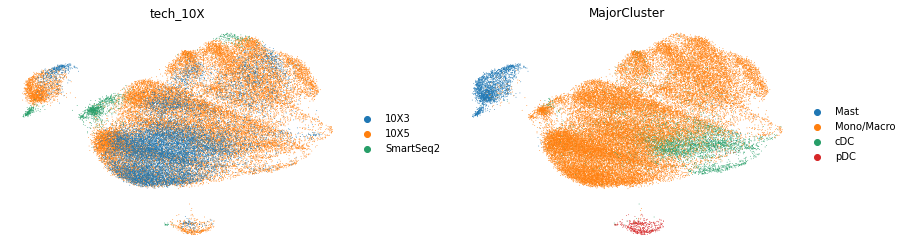

In [12]:
sc.pl.umap(train, color=["tech_10X", "MajorCluster"], wspace=.2, frameon=False)

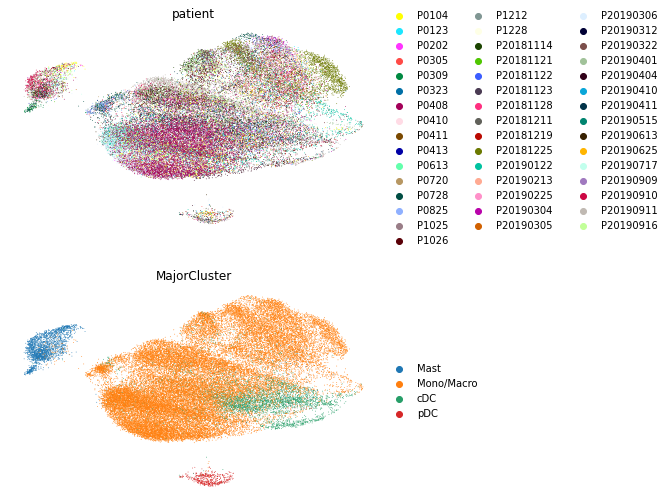

In [13]:
sc.pl.umap(train, color=["patient", "MajorCluster"], wspace=.2, frameon=False, ncols=1)

# Preprocessing Data

In [14]:
train = scgen.setup_anndata(train, batch_key="tech_10X", labels_key="MajorCluster",  copy=True)

INFO     Using batches from adata.obs["tech_10X"]                                            
INFO     Using labels from adata.obs["MajorCluster"]                                         
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              


/home/data/vip8t02/anaconda3/envs/scgen-2.0.0/lib/python3.9/site-packages/scvi/data/_utils.py:22: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  warnings.warn(


INFO     Successfully registered anndata object containing 45251 cells, 1999 vars, 3 batches,
         4 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


Creating and Saving the model

In [15]:
model = scgen.SCGEN(train)

/home/data/vip8t02/anaconda3/envs/scgen-2.0.0/lib/python3.9/site-packages/scvi/model/base/_base_model.py:149: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


In [9]:
model.train(
    max_epochs=100,
    early_stopping=True,
    early_stopping_patience=25,
    use_gpu=False
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 1/100:   0%|          | 0/100 [00:00<?, ?it/s]

/home/data/vip8t02/anaconda3/envs/scgen-2.0.0/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:897: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn('Detected KeyboardInterrupt, attempting graceful shutdown...')
